In [4]:
import os.path
from gensim import corpora
from gensim.models import LsiModel
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt


In [5]:
def load_data(path,file_name):
    
    documents_list = []
    titles=[]
    with open( os.path.join(path, file_name) ,"r",encoding="utf-8") as fin:
        for line in fin.readlines():
            text = line.strip()
            documents_list.append(text)
    print("Total Number of Documents:",len(documents_list))
    titles.append( text[0:min(len(text),100)] )
    return documents_list,titles

In [6]:
def preprocess_data(doc_set):
   
    
    tokenizer = RegexpTokenizer(r'\w+')
    en_stop = set(stopwords.words('turkish'))
    p_stemmer = PorterStemmer()
    texts = []
    
    for i in doc_set:

        raw = i.lower()
        tokens = tokenizer.tokenize(raw)
        stopped_tokens = [i for i in tokens if not i in en_stop]
        stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
        texts.append(stemmed_tokens)
    return texts

In [7]:
def prepare_corpus(doc_clean):
    
    dictionary = corpora.Dictionary(doc_clean)
    doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
    
    return dictionary,doc_term_matrix

In [8]:

def create_gensim_lsa_model(doc_clean,number_of_topics,words):
    
    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    lsamodel = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  # train model
    print(lsamodel.print_topics(num_topics=number_of_topics, num_words=words))
    return lsamodel

In [9]:
def compute_coherence_values(dictionary, doc_term_matrix, doc_clean, stop, start=2, step=3):
    
    coherence_values = []
    model_list = []
    for num_topics in range(start, stop, step):
       
        model = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  # train model
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=doc_clean, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

In [10]:
def plot_graph(doc_clean,start, stop, step):
    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    model_list, coherence_values = compute_coherence_values(dictionary, doc_term_matrix,doc_clean,
                                                            stop, start, step,)
   
    x = range(start, stop, step)
    plt.plot(x, coherence_values)
    plt.xlabel("Number of Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.show()
    
   

In [11]:
number_of_topics=7
words=10
document_list,titles=load_data("","waste_facility.csv")
clean_text=preprocess_data(document_list)
model=create_gensim_lsa_model(clean_text,number_of_topics,words)

Total Number of Documents: 28
[(0, '-0.394*"mevcut" + -0.322*"41" + -0.270*"2" + -0.256*"28" + -0.256*"anadolu" + -0.245*"i" + -0.199*"atık" + -0.182*"1" + -0.160*"stasyonu" + -0.147*"29"'), (1, '-0.283*"avrupa" + -0.283*"29" + -0.274*"1" + 0.274*"2" + 0.253*"28" + 0.253*"anadolu" + -0.180*"le" + -0.180*"1659" + -0.176*"şi" + 0.161*"kemerburgaz"'), (2, '-0.317*"i" + 0.258*"kemerburgaz" + -0.228*"stasyonu" + 0.211*"hasdal" + 0.210*"tesisi" + -0.194*"katı" + 0.188*"köyü" + -0.176*"aktarma" + -0.174*"atık" + 0.172*"1325"'), (3, '-0.349*"çobançeşm" + -0.318*"yenibosna" + -0.222*"evler" + -0.195*"bahç" + -0.195*"2005" + -0.195*"40184" + -0.195*"sanayi" + -0.192*"40" + -0.172*"caddesi" + 0.171*"stasyonu"'), (4, '0.257*"hizmet" + 0.243*"birimi" + 0.224*"no" + -0.214*"hasdal" + -0.206*"stasyonu" + -0.188*"kemerburgaz" + -0.182*"aktarma" + 0.175*"41" + -0.163*"katı" + -0.153*"atık"'), (5, '-0.261*"birimi" + 0.238*"bb" + 0.238*"beyoğlu" + 0.180*"i" + -0.171*"cad" + 0.171*"atık" + -0.145*"hekimba

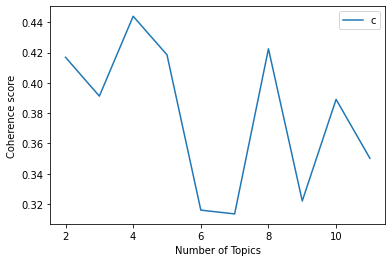

In [12]:
start,stop,step= 2, 12, 1
plot_graph(clean_text,start,stop,step)

In [13]:
from gensim.models import LsiModel
from snowballstemmer import TurkishStemmer
import pandas as pd
import re
import nltk

In [14]:
def freq(str): 
  
    
    str = str.split()          
    str2 = [] 
  
    
    for i in str:              
  
       
        if i not in str2: 
  
           
            str2.append(i)  
              
    for i in range(0, len(str2)): 
  
        print('Frequency of', str2[i], 'is :', str.count(str2[i]))

In [15]:
f = open('waste_facility.csv', 'r', encoding='utf8')
doc = f.read()

freq(doc)

Frequency of FACILITY_NAME,STATUS,ADDRESS,NEIGHBORHOOD_UAVT_CODE,NEIGHBORHOOD_NAME,COUNTY_UAVT_CODE,COUNTY_NAME,LOCATED_REGION_ID,LOCATED_REGION_NAME,LONGTITUDE,LATITUDE is : 1
Frequency of Silivri is : 1
Frequency of Katı is : 8
Frequency of Atık is : 12
Frequency of Aktarma is : 8
Frequency of İstasyonu,Mevcut,Yenimahalle is : 1
Frequency of 1 is : 1
Frequency of Kasım is : 1
Frequency of Cad. is : 7
Frequency of Hasan is : 1
Frequency of Çeşme is : 1
Frequency of Mevkii is : 7
Frequency of ,40921,YENİ,1622,SİLİVRİ,2,Anadolu,28.2901838395005,41.0910384187238 is : 1
Frequency of Ümraniye is : 1
Frequency of Hizmet is : 7
Frequency of Birimi,Mevcut,Hekimbaşı is : 1
Frequency of Küçüksu is : 1
Frequency of Asfalt is : 1
Frequency of sokak,40744,HEKİMBAŞI,1852,ÜMRANİYE,1,Avrupa,29.1057799005654,41.0573148489299 is : 1
Frequency of Bakkalköy is : 1
Frequency of İstasyonu is : 3
Frequency of ,Mevcut,Atatürk is : 2
Frequency of Mah. is : 6
Frequency of Erzincan is : 1
Frequency of ,40531,KÜ

In [16]:
words = re.sub(r'[^\w\s]', '', doc).split()

In [17]:
count_bigrams = (pd.Series(nltk.ngrams(words, 2)).value_counts())
count_bigrams[count_bigrams > 5]

(Katı, Atık)       8
(Atık, Aktarma)    7
dtype: int64

In [18]:
count_trigrams = (pd.Series(nltk.ngrams(words, 3)).value_counts())
count_trigrams[count_trigrams > 5]

(Katı, Atık, Aktarma)    7
dtype: int64

In [19]:
from csv import reader

In [20]:
with open('waste_facility.csv',  encoding="utf8") as read_obj:
   
    csv_reader = reader(read_obj)
    list_of_rows = list(csv_reader)
    print(list_of_rows)

[['FACILITY_NAME', 'STATUS', 'ADDRESS', 'NEIGHBORHOOD_UAVT_CODE', 'NEIGHBORHOOD_NAME', 'COUNTY_UAVT_CODE', 'COUNTY_NAME', 'LOCATED_REGION_ID', 'LOCATED_REGION_NAME', 'LONGTITUDE', 'LATITUDE'], ['Silivri Katı Atık Aktarma İstasyonu', 'Mevcut', 'Yenimahalle 1 Kasım Cad. Hasan Çeşme Mevkii ', '40921', 'YENİ', '1622', 'SİLİVRİ', '2', 'Anadolu', '28.2901838395005', '41.0910384187238'], ['Ümraniye Hizmet Birimi', 'Mevcut', 'Hekimbaşı Küçüksu Cad. Asfalt sokak', '40744', 'HEKİMBAŞI', '1852', 'ÜMRANİYE', '1', 'Avrupa', '29.1057799005654', '41.0573148489299'], ['Bakkalköy Katı Atık Aktarma İstasyonu ', 'Mevcut', 'Atatürk Mah. Erzincan Cad. ', '40531', 'KÜÇÜKBAKKALKÖY', '2049', 'ATAŞEHİR', '1', 'Avrupa', '29.1299673906002', '40.9852051289414'], ['Kömürcüoda Enerji Üretim (LFG) Tesisi', 'Mevcut', 'K.Oda Mevkii Karakiraz Köyü', '191957', 'KARAKİRAZ', '1659', 'ŞİLE', '1', 'Avrupa', '29.3774226299322', '41.1457535289401'], ['Baruthane Katı Atık Aktarma İstasyonu', 'Mevcut', 'Paşa Mah. Piyalepaşa Bul

In [21]:
import re
import nltk


nltk.download('punkt')
from nltk.tokenize import word_tokenize


nltk.download('stopwords')
from nltk.corpus import stopwords

from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

def process_text(text):
  
    text = re.sub('[^A-Za-z]', ' ', text.lower())
    tokenized_text = word_tokenize(text)
    clean_text = [
        stemmer.stem(word) for word in tokenized_text
        if word not in stopwords.words('english')
    ]

    
    return clean_text

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
list_of_rows = list_of_rows[1:]

texts = [row[0] for row in list_of_rows]
topics = [row[2] for row in list_of_rows]


texts = [" ".join(process_text(text)) for text in texts]

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

In [31]:
matrix = CountVectorizer(max_features=100000)
vectors = matrix.fit_transform(texts).toarray()

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
vectors_train, vectors_test, topics_train, topics_test = train_test_split(vectors, topics)

In [34]:
from sklearn.naive_bayes import GaussianNB

In [35]:
classifier = GaussianNB()
classifier.fit(vectors_train, topics_train)

GaussianNB()

In [36]:
topics_pred = classifier.predict(vectors_test)

In [37]:
from sklearn.metrics import classification_report
print(classification_report(topics_test, topics_pred))

                                                                         precision    recall  f1-score   support

                                 70 Evler Mevkii Gülsuyu Mezarlığı Üstü       0.00      0.00      0.00         1
                             Atatürk Mah. Cemal Gürsel Cad. No:14 Kıraç       0.00      0.00      0.00         0
                                            Atatürk Mah. Erzincan Cad.        0.00      0.00      0.00         0
Edirnekapı İ.E.T.T Otobüs Garajı Yanı Topçular Mah. Bostan Aralığı Sk.        0.00      0.00      0.00         1
                                            K.Oda Mevkii Karakiraz Köyü       0.50      1.00      0.67         1
                Kemerburgaz Yolu Eski Hasdal Çöplüğü Hasdal Kemerburgaz       1.00      1.00      1.00         1
                                  Vişnezade Mah. Kadırgalar Cad. No:53        0.00      0.00      0.00         1
                           Yenimahalle 1 Kasım Cad. Hasan Çeşme Mevkii        0.00      0.00   

c:\users\asus\pycharmprojects\metinmadenciliği\venv\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\asus\pycharmprojects\metinmadenciliği\venv\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\asus\pycharmprojects\metinmadenciliği\venv\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_st